In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
import numpy as np
import nibabel as nib

from neurosynth.base.dataset import Dataset
dataset = Dataset.load("neurosynth_60_0.6.pkl")

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import nilearn.plotting as niplt

%aimport plotting
%aimport coactivation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, I'm going to load the masks and define some colors. **Posterior is red and anterior is blue.**

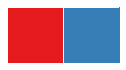

In [2]:
posterior_FPCN = nib.load('masks/Yeo_posterior_FPCN.nii')
anterior_FPCN = nib.load('masks/Yeo_anterior_FPCN.nii')
colors = sns.color_palette('Set1', 2)
sns.palplot(colors)

Next, I'm going to join the two masks into one image with different level (required by a latter analysis)

In [21]:
## Join the two masks
from copy import deepcopy
joint_FPCN = deepcopy(anterior_FPCN)
joint_data = joint_FPCN.get_data()
joint_data[joint_data == 1] = 2
joint_data[:] = joint_data + posterior_FPCN.get_data()
nib.save(joint_FPCN, 'masks/Yeo_combined.nii.gz')

The following sets up pysurfer for inflated brain visualization:

In [4]:
%gui qt
from surfer import Brain
import os
from IPython.display import Image
from plotting import surf_coactivation

os.environ['SUBJECTS_DIR'] = '/Applications/freesurfer/subjects/'
os.environ['FREESURFER_HOME'] = '/Applications/freesurfer/'

# Brain parameters to be used across all
brain_kwargs = {'size' : (780, 800), 'background' : 'white', 'views' : ['lat', 'med'], 'cortex' : 'bone'}

Here's what the two clusters look like on an inflated brain

In [12]:
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
plotting.surf_clusters(brain, joint_FPCN, colormap=colors)
brain.save_image('plots/FPCN.png')

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpR5lP7o.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sC0dE9k.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpR5lP7o.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-max 0 1 0.1 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sVEMM4B.mgz


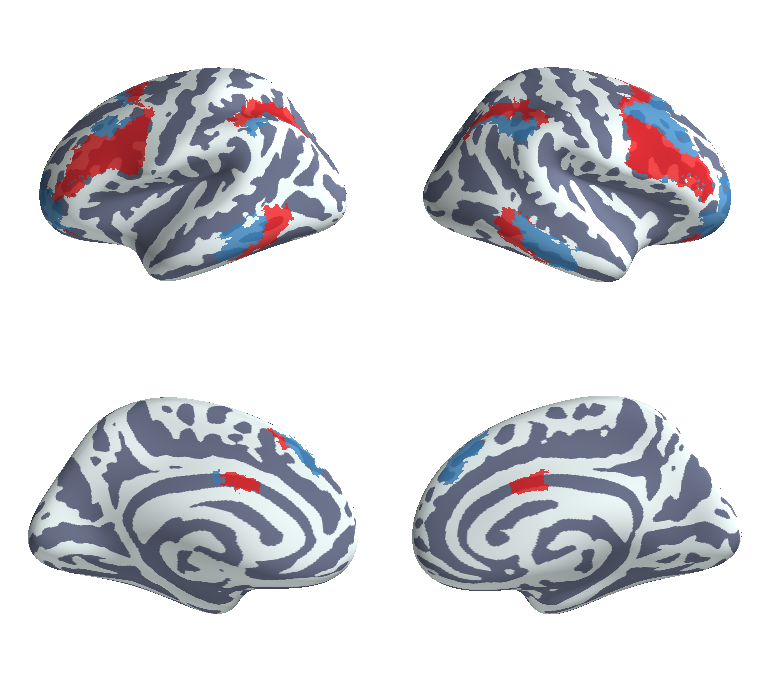

In [13]:
Image('plots/FPCN.png')

## Co-activation analysis

The following analysis identifies voxels that co-activate to a greater with one region than the other. Voxels in red, for example, co-activate to a greater extent with anterior FPCN than posterior FPCN. 

More specifically, this analysis is conducting a meta-analysis contrast between studies that activate region 1 and region 2. So in essence, the resulting images reflect voxels that activate more frequently in one set of studies, versus the other. 

The following is at an alpha threshold of FDR q=0.05.

In [79]:
# Co-activation contrast analysis
fpcn_contrast_include = coactivation.coactivation_contrast(dataset, joint_FPCN, 
            target_thresh=0.05, other_thresh=0.05, contrast='others', q=0.05)

# Plot on an inflated brain
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
plotting.surf_coactivation(brain, fpcn_contrast_include, colormap=colors)

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpv9gkdx.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sDAGX0f.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpv9gkdx.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2spwMzYI.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpgXHESI.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sCuqGGO.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpgXHESI.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s2Um6rV.mgz


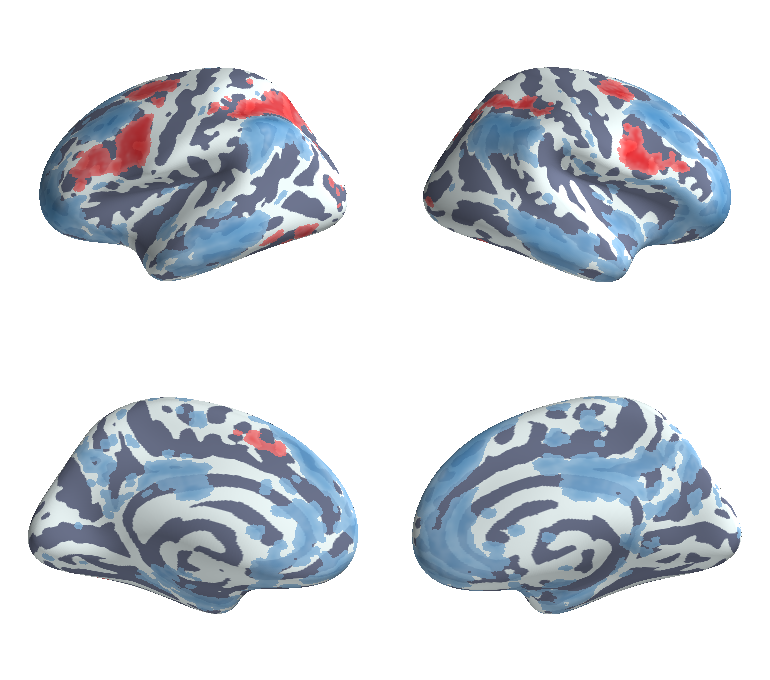

In [78]:
out = 'plots/FPCN_co-activation_contrast.png'
brain.save_image(out)
Image(out)

To take a peek at what else would be significant using a lower threshold, I reran this analysis with FDR q = 0.1. 

By the way, I've read up on it and although most reviewers expect to see q=0.05, q is not like p, and some believe that for exploratory analysis q > 0.05 is pefectly fine, as long as you are upfront about it

In [80]:
# Co-activation contrast analysis
fpcn_contrast_include = coactivation.coactivation_contrast(dataset, joint_FPCN, 
            target_thresh=0.05, other_thresh=0.05, contrast='others', q=0.1)

# Plot on an inflated brain
brain = Brain('fsaverage', 'split', 'inflated', **brain_kwargs)
plotting.surf_coactivation(brain, fpcn_contrast_include, colormap=colors)

mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpvaf75Y.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sIzDcgc.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpvaf75Y.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s64f_cb.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpXJswiY.nii.gz --hemi lh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2sCF3RTD.mgz
mri_vol2surf --mov /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/tmpXJswiY.nii.gz --hemi rh --surf white --regheader fsaverage --projfrac-avg 0 1 0.1 --surf-fwhm 2 --o /var/folders/t3/_lfrdgjn4k5152_zgh5q65ym0000gp/T/pysurfer-v2s_wHunQ.mgz


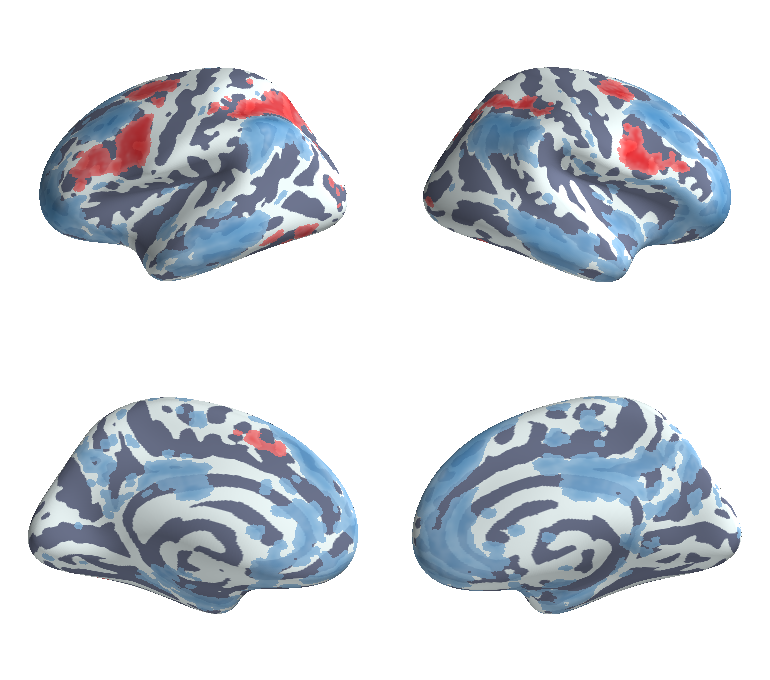

In [81]:
out = 'plots/FPCN_co-activation_contrast_q=1.png'
brain.save_image(out)
Image(out)

## Discussion / Observations

First, notice that each region/network co-activates with itself. This is not only normal, but it's something you want to see, since by definition this network is defined on the basis of high functional connectivity. So it would be weird if this network did *not* co-activate with itself.

Second, there are robust differences in co-activation with other parts of the brain between the two networks. Supporting your hypothesis, anterior FPCN co-activates to a much greater extent with the default network (e.g. mPFC, PCC, parts of the temporal lobe), to a greater extent than posterior FPCN.

There is not as much evidence for posterior FPCN co-activating to a greater extent with the dorsal attention network (DAN). However, if you look closely, posterior FPCN co-activates to a greater extent with superior lateral parital areas, that may be considered DAN. Also, in superior frontal gyrus, this network co-activates a bit with portions of DAN adjacent to itself. However, I wouldn't make too big of a deal of this, as rarely as